In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

train_df = pd.read_csv("train.csv")
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
test_df = pd.read_csv("test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
#removing unneeded features
remove_list = ['Ticket', 'Cabin', 'Name']
test_df = test_df.drop(remove_list, axis=1)
train_df = train_df.drop(remove_list, axis=1)

print(test_df)
print(train_df)

     PassengerId  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0            892       3    male  34.5      0      0    7.8292        Q
1            893       3  female  47.0      1      0    7.0000        S
2            894       2    male  62.0      0      0    9.6875        Q
3            895       3    male  27.0      0      0    8.6625        S
4            896       3  female  22.0      1      1   12.2875        S
..           ...     ...     ...   ...    ...    ...       ...      ...
413         1305       3    male   NaN      0      0    8.0500        S
414         1306       1  female  39.0      0      0  108.9000        C
415         1307       3    male  38.5      0      0    7.2500        S
416         1308       3    male   NaN      0      0    8.0500        S
417         1309       3    male   NaN      1      1   22.3583        C

[418 rows x 8 columns]
     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0              1         0       3   

In [4]:
#finding blanks NaN in each column
print(test_df.isnull().sum())
print(train_df.isnull().sum())

#We now have to fix Age, Fare, and Embarked
#Filling Age with average age
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())
train_df['Age'] = train_df['Age'].fillna(test_df['Age'].mean())

#seeing all values for Emarked and filling NaN with the most common one which is "S"
print(train_df['Embarked'].value_counts())
train_df['Embarked'] = train_df['Embarked'].fillna('S')


#Filling Fare with Average
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [5]:
#checking for blanks??
print(test_df.isnull().sum())
print(train_df.isnull().sum())

#WORKS!

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


<AxesSubplot:>

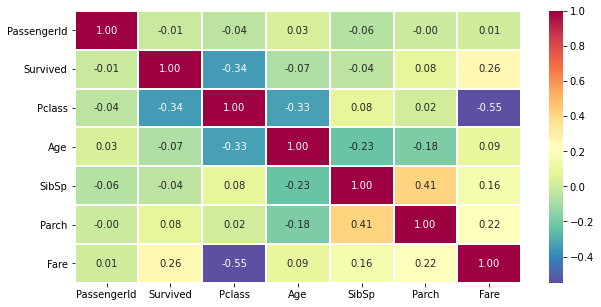

In [6]:
#seeing our training data correlation
plt.figure(figsize=(10, 5))
sns.heatmap(train_df.corr(), cmap='Spectral_r', linewidths=1, annot=True, fmt='.2f')

In [7]:
#numeric sex
train_df['Sex'] = train_df['Sex'].replace({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].replace({'male': 0, 'female': 1})
#numeric embarked
train_df['Embarked'] = train_df['Embarked'].replace({'C': 1, 'S':2, 'Q': 3})
test_df['Embarked'] = test_df['Embarked'].replace({'C': 1, 'S': 2, 'Q': 3})


In [8]:
#1) Completed! Preprocessed the data, imputed missing values as you see fit, and removed features
#that were useless

print(test_df)
print(train_df)

     PassengerId  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0            892       3    0  34.50000      0      0    7.8292         3
1            893       3    1  47.00000      1      0    7.0000         2
2            894       2    0  62.00000      0      0    9.6875         3
3            895       3    0  27.00000      0      0    8.6625         2
4            896       3    1  22.00000      1      1   12.2875         2
..           ...     ...  ...       ...    ...    ...       ...       ...
413         1305       3    0  30.27259      0      0    8.0500         2
414         1306       1    1  39.00000      0      0  108.9000         1
415         1307       3    0  38.50000      0      0    7.2500         2
416         1308       3    0  30.27259      0      0    8.0500         2
417         1309       3    0  30.27259      1      1   22.3583         1

[418 rows x 8 columns]
     PassengerId  Survived  Pclass  Sex       Age  SibSp  Parch     Fare  \
0           

In [9]:
X_train = train_df.drop(["Survived","PassengerId"], axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

print(X_train)
print(Y_train)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)

Y_prediction = rf.predict(X_test)

rf.score(X_train, Y_train)


     Pclass  Sex       Age  SibSp  Parch     Fare  Embarked
0         3    0  22.00000      1      0   7.2500         2
1         1    1  38.00000      1      0  71.2833         1
2         3    1  26.00000      0      0   7.9250         2
3         1    1  35.00000      1      0  53.1000         2
4         3    0  35.00000      0      0   8.0500         2
..      ...  ...       ...    ...    ...      ...       ...
886       2    0  27.00000      0      0  13.0000         2
887       1    1  19.00000      0      0  30.0000         2
888       3    1  30.27259      1      2  23.4500         2
889       1    0  26.00000      0      0  30.0000         1
890       3    0  32.00000      0      0   7.7500         3

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


0.9820426487093153

In [10]:
#Saving predicitons and uploading to Kaggle
pass_id = test_df["PassengerId"]
df_final = pd.DataFrame({"PassengerId": pass_id.values, "Survived":Y_prediction})

print(df_final)


df_final.to_csv("submission_lsam227.csv", index = False)


     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         1
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


2) 11486
Sam Lasker
0.75837 Accuracy


https://www.kaggle.com/c/titanic/leaderboard# number 11486 on the leaderboard.